# Decision Tree Pruning

### Why Prune a Decision Tree?
- Unpruned decision trees tend to overfit the training data — especially if the tree is deep.
- They memorize noise and anomalies
- Their performance drops on unseen data
- ➡️ Pruning helps simplify the tree and improve generalization.

###  What is Pruning?
Pruning means reducing the size of a decision tree by removing parts that provide little power to classify instances.

### 1. Pre-Pruning (Early Stopping)
Also called early stopping, pre-pruning stops the tree from growing once a certain condition is met.



##### Stopping Criteria (Pre-Pruning Options):
| Parameter           | Description                                          |
| ------------------- | ---------------------------------------------------- |
| `max_depth`         | Max depth of the tree                                |
| `min_samples_split` | Minimum samples required to split a node             |
| `min_samples_leaf`  | Minimum samples allowed at a leaf node               |
| `max_leaf_nodes`    | Maximum number of leaf nodes                         |
| `max_features`      | Maximum number of features to consider at each split |


- Example:
```
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
tree.fit(X_train, y_train)
```

### 2. Post-Pruning (Cost Complexity Pruning)

- Also called "Minimal Cost-Complexity Pruning", this occurs after the full tree is built.
- It then prunes bottom-up, removing the least important nodes based on a trade-off:

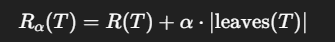
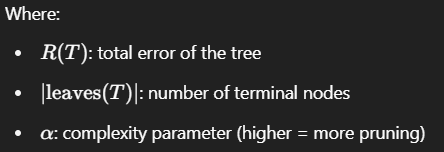

##### In sklearn: ccp_alpha (introduced in v0.22)
```
from sklearn.tree import DecisionTreeClassifier

# Step 1: Train a full tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Step 2: Get pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

# Step 3: Train trees for different alphas
trees = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

# Step 4: Evaluate and pick best
scores = [tree.score(X_test, y_test) for tree in trees]
best_index = scores.index(max(scores))
best_tree = trees[best_index]
```

# Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from mlxtend.plotting import plot_decision_regions

In [2]:
ds= pd.read_csv('Social_Network_Ads.csv')
ds.drop(columns=['User ID', 'Gender'], inplace=True)
ds.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


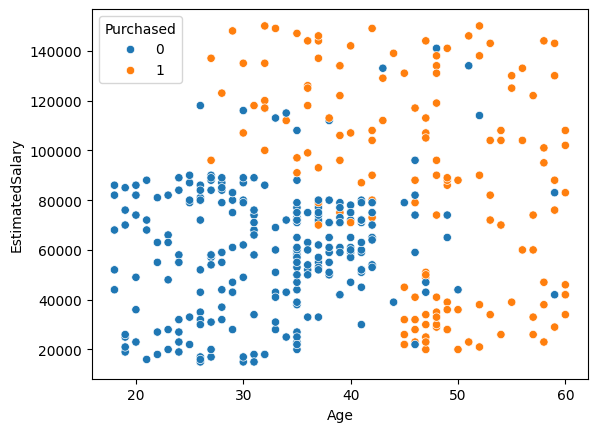

In [3]:
sns.scatterplot(x='Age', y='EstimatedSalary', data= ds, hue='Purchased')
plt.show()

In [4]:
x = ds.drop(columns=['Purchased'])
y = ds['Purchased']
x, y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [5]:
SDS = StandardScaler()
x_scalled = pd.DataFrame(SDS.fit_transform(x), columns=x.columns)
x_scalled

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_scalled, y, test_size=0.2, random_state=42)

### Pre Pruning

In [12]:
# Pruning (pre pruning)
modelP = DecisionTreeClassifier(max_depth=3)
modelP.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
modelP.score(X_test,y_test)*100

91.25

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


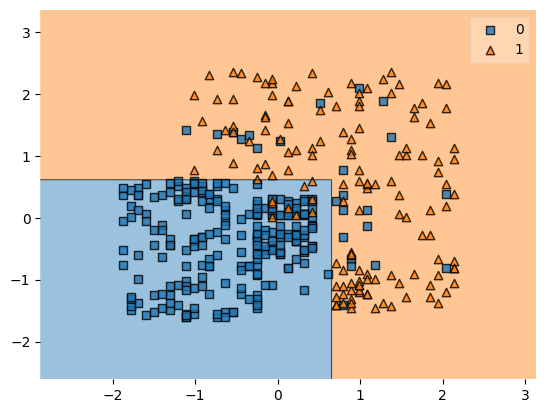

In [14]:
plot_decision_regions(x_scalled.to_numpy(), y.to_numpy(), clf=modelP) # it made an place proprely.
plt.show()

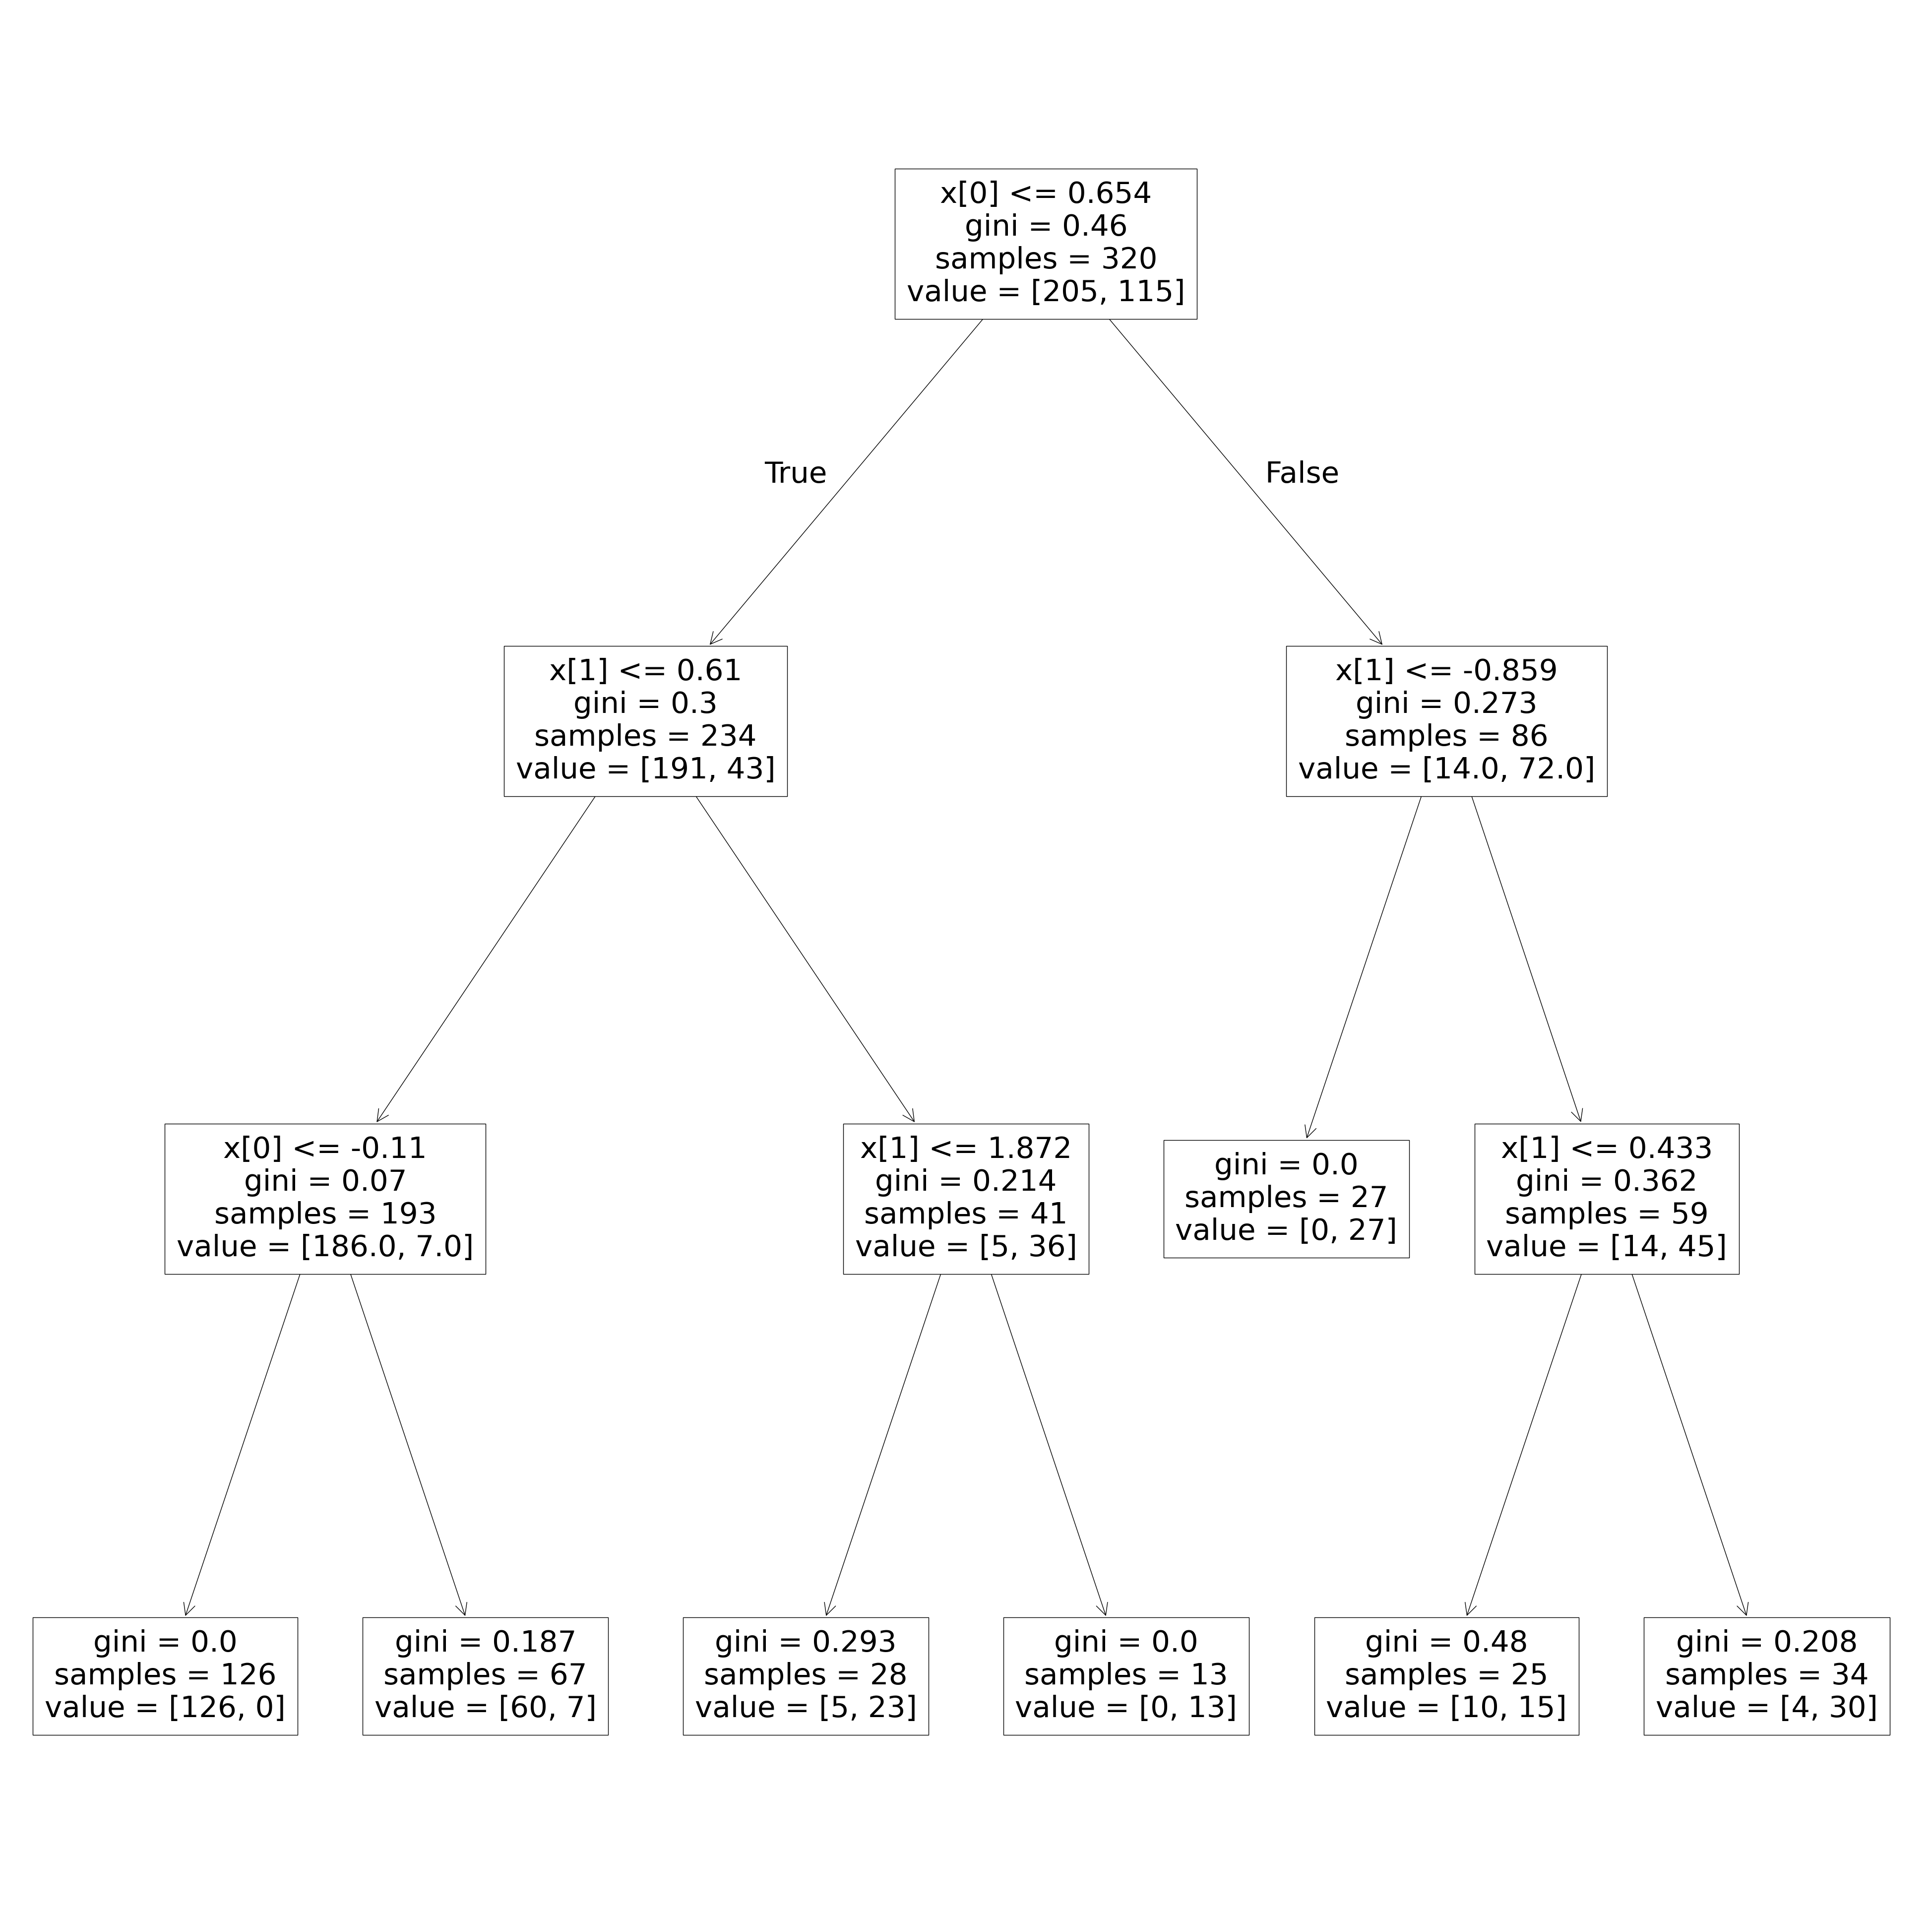

In [15]:
plt.figure(figsize=(50, 50))
plot_tree(modelP)
plt.show()

### Post Pruning
- here we can see 2 and 3 are good to go then we will add this to maxdepth above in the model function.

In [11]:
for i in range(1, 20):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    print(i, model.score(X_train, y_train)*100, model.score(X_test, y_test)*100)

1 82.1875 90.0
2 91.875 91.25
3 91.875 91.25
4 93.125 91.25
5 93.4375 90.0
6 95.0 86.25
7 96.875 85.0
8 97.1875 85.0
9 98.125 85.0
10 98.4375 85.0
11 99.0625 83.75
12 99.0625 83.75
13 99.6875 83.75
14 99.6875 83.75
15 99.6875 83.75
16 99.6875 83.75
17 99.6875 83.75
18 99.6875 83.75
19 99.6875 83.75
